In [1]:
# Comparacion

from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import numpy as np

## One class SVM

In [4]:
train = pd.read_csv('CROSS_0/Procesado_MatrizZ/Entrenamiento.csv', header=None).drop(72, axis=1) 
valid_sano = pd.read_csv('CROSS_0/Procesado_MatrizZ/Validar.csv', header=None).drop(72, axis=1) 
test_sano = pd.read_csv('CROSS_0/Procesado_MatrizZ/Testeo_Sanos.csv', header=None).drop(72, axis=1) 
test_dano_1 = pd.read_csv('CROSS_0/Procesado_MatrizZ/Fallo1.csv', header=None).drop(72, axis=1) 
test_dano_2 = pd.read_csv('CROSS_0/Procesado_MatrizZ/Fallo2.csv', header=None).drop(72, axis=1) 
test_dano_3 = pd.read_csv('CROSS_0/Procesado_MatrizZ/Fallo3.csv', header=None).drop(72, axis=1) 
test_dano_4 = pd.read_csv('CROSS_0/Procesado_MatrizZ/Fallo4.csv', header=None).drop(72, axis=1) 
train

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-1.812158,3.217156,0.350761,-1.369288,0.515122,0.600575,-1.364183,2.503679,2.320076,-1.350177,...,1.998478,1.116960,-0.111975,1.390354,-0.333762,-0.359525,-0.454836,0.528516,0.287115,1.728255
1,-2.235936,2.694053,1.223120,-1.472601,0.361710,-0.263067,-1.357454,2.207045,1.856622,-1.581570,...,2.992950,0.311024,-0.694390,0.541644,-0.826887,0.313106,1.220485,-0.033371,0.286125,-0.033173
2,-1.927922,3.105845,1.267345,-1.425841,0.707145,0.043724,-1.386444,1.630982,3.556536,-1.390921,...,5.783092,1.323061,-1.241683,0.710307,0.686552,-0.731920,-0.482734,0.745747,0.013047,0.513666
3,-2.074381,2.675180,0.429512,-1.365598,0.820610,0.820906,-1.318250,2.473601,2.300059,-1.467371,...,0.564852,0.591336,-0.327275,1.983985,-0.855859,0.246809,1.067995,0.394339,0.170156,2.612055
4,-2.150803,2.679648,1.830032,-1.503132,0.465324,0.110258,-1.386456,1.928185,0.656150,-1.502077,...,3.865622,0.806259,-0.412767,0.788796,-0.221982,-0.173597,-1.232362,0.356119,0.131493,1.099789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,1.652583,-0.765475,-0.801022,1.357820,1.608083,0.987817,1.344963,-0.774646,-0.805808,1.218211,...,-0.552139,-1.001254,-3.320241,-1.183035,-1.073223,-1.663611,-0.834583,-1.589555,2.349536,-0.817108
1116,0.419643,-1.730902,-0.696396,1.725098,0.970891,-0.634984,2.464345,-2.428896,-1.413345,2.418140,...,-1.418829,-0.960579,-1.748600,-1.258399,-1.225981,-1.560263,0.224482,-1.504018,2.290971,-0.337308
1117,0.813098,-1.401045,-0.194313,1.132609,1.345473,0.290521,1.563662,-1.839324,-0.859258,1.394701,...,0.049424,-1.007624,-2.625040,-1.332387,-0.943559,-1.699485,-1.198310,-1.601045,2.720870,-0.206770
1118,-0.053002,-1.624499,-1.110135,1.079513,0.993546,0.168881,1.582735,-1.640238,-0.086821,1.535140,...,-1.221488,-1.152824,-1.346330,-1.080023,-1.511341,-2.078759,-0.332620,-1.672237,2.524915,-1.237206


In [7]:

# 2. Concatenar test set completo
test_all = pd.concat([test_sano, test_dano_1, test_dano_2, test_dano_3, test_dano_4], axis=0)
y_true = [0]*len(test_sano) + [1]*len(test_dano_1) + [1]*len(test_dano_2) + [1]*len(test_dano_3) + [1]*len(test_dano_4)


In [8]:
train_completed = pd.concat([train, valid_sano], axis=0)
train_completed

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-1.812158,3.217156,0.350761,-1.369288,0.515122,0.600575,-1.364183,2.503679,2.320076,-1.350177,...,1.998478,1.116960,-0.111975,1.390354,-0.333762,-0.359525,-0.454836,0.528516,0.287115,1.728255
1,-2.235936,2.694053,1.223120,-1.472601,0.361710,-0.263067,-1.357454,2.207045,1.856622,-1.581570,...,2.992950,0.311024,-0.694390,0.541644,-0.826887,0.313106,1.220485,-0.033371,0.286125,-0.033173
2,-1.927922,3.105845,1.267345,-1.425841,0.707145,0.043724,-1.386444,1.630982,3.556536,-1.390921,...,5.783092,1.323061,-1.241683,0.710307,0.686552,-0.731920,-0.482734,0.745747,0.013047,0.513666
3,-2.074381,2.675180,0.429512,-1.365598,0.820610,0.820906,-1.318250,2.473601,2.300059,-1.467371,...,0.564852,0.591336,-0.327275,1.983985,-0.855859,0.246809,1.067995,0.394339,0.170156,2.612055
4,-2.150803,2.679648,1.830032,-1.503132,0.465324,0.110258,-1.386456,1.928185,0.656150,-1.502077,...,3.865622,0.806259,-0.412767,0.788796,-0.221982,-0.173597,-1.232362,0.356119,0.131493,1.099789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.278541,2.749631,2.728037,-0.992570,-1.150461,-0.719854,-0.776319,2.384914,3.769049,-0.944714,...,-1.409371,2.703892,0.972526,0.375030,4.654232,-1.637730,-2.049829,4.504766,-3.967576,-0.819645
156,-0.181929,2.623730,0.515593,-0.850862,-1.084787,-1.344748,-0.965236,1.338227,4.350287,-0.996266,...,0.600329,2.648554,1.190625,-0.309920,2.938831,-0.026125,-0.574541,3.891393,-1.968960,-0.916807
157,0.549304,2.666482,0.641364,-0.553711,-0.498926,0.082361,-0.629027,1.932831,2.603081,-0.699367,...,-0.082025,2.858899,0.299439,0.360446,5.395372,-1.910180,-2.409113,5.171846,-4.041647,-1.337080
158,-0.313699,2.285127,2.430953,-0.642411,-1.226881,-1.117167,-0.850632,1.638081,1.516201,-0.657390,...,-1.562965,2.509306,1.687387,-0.357623,2.612117,0.644624,-0.776999,3.305137,-2.595010,-0.986409


In [18]:
# 3. One-Class SVM
print("\n🔵 One-Class SVM")
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)  # nu = proporción esperada de outliers
ocsvm.fit(train)




🔵 One-Class SVM


OneClassSVM(gamma='auto', nu=0.05)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       160
           1     0.8000    1.0000    0.8889       640

    accuracy                         0.8000       800
   macro avg     0.4000    0.5000    0.4444       800
weighted avg     0.6400    0.8000    0.7111       800



c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

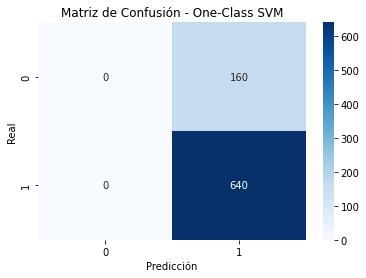

In [19]:
# Predecir: 1 (normal), -1 (anomalía)
y_pred_ocsvm = ocsvm.predict(test_all)
y_pred_ocsvm = [0 if p == 1 else 1 for p in y_pred_ocsvm]  # convertir a 0=normal, 1=anomalía

print(classification_report(y_true, y_pred_ocsvm, digits=4))
sns.heatmap(confusion_matrix(y_true, y_pred_ocsvm), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - One-Class SVM")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [20]:
val_scores = -ocsvm.decision_function(train_completed)
# threshold = np.percentile(val_scores, 100)  # o 97, 99, depende tu sensibilidad
# threshold
mean_score = np.mean(val_scores)
std_score = np.std(val_scores)
k = 3  # 3 sigma

threshold = mean_score + k * std_score
threshold

3.840511990407699

In [13]:
def group_scores(scores, group_size=32):
    """Agrupa una lista de scores en bloques del tamaño especificado."""
    n_groups = len(scores) // group_size
    #return np.array(scores[:n_groups * group_size]).reshape(n_groups, group_size)
    return np.array_split(scores[:n_groups * group_size], n_groups)

def plot_grouped_scores(grouped_scores, threshold, title, color='yellow'):
    """Genera un boxplot de los anomaly scores agrupados."""
    plt.figure(figsize=(10, 5))
    plt.boxplot(grouped_scores, patch_artist=True,
                boxprops=dict(facecolor=color, color='black'),
                medianprops=dict(color='black'))

    plt.axhline(threshold, color='red', linestyle='--', linewidth=1.5, label=f'Threshold ({threshold:.3f})')
    plt.legend()
    plt.title(title)
    plt.ylabel("Anomaly Score")
    plt.xlabel("Groups of 32 time segments")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [21]:
#Scores
scores_test_dano1 = -ocsvm.decision_function(test_dano_1)
scores_test_dano2 = -ocsvm.decision_function(test_dano_2)
scores_test_dano3 = -ocsvm.decision_function(test_dano_3)
scores_test_dano4 = -ocsvm.decision_function(test_dano_4)
scores_test_sano = -ocsvm.decision_function(test_sano)
scores_train = -ocsvm.decision_function(train)
scores_test_dano3

array([6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611966,
       6.92611966, 6.92611966, 6.92611966, 6.92611966, 6.92611

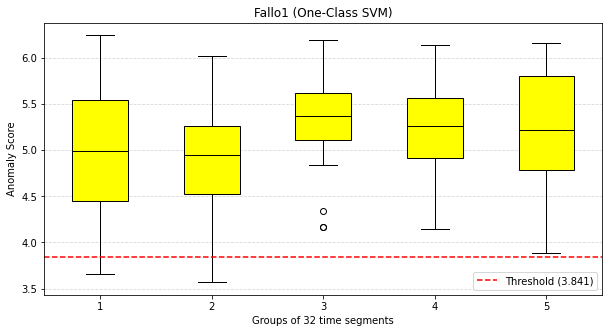

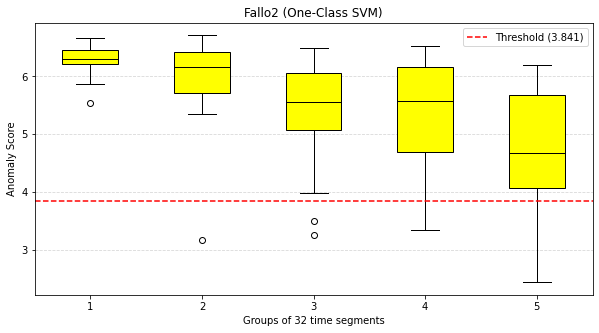

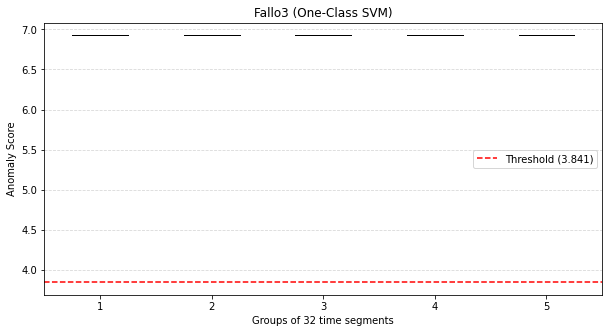

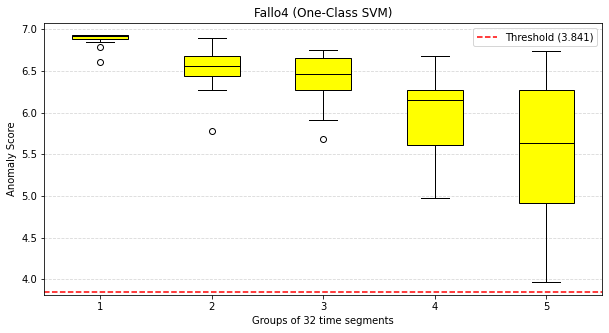

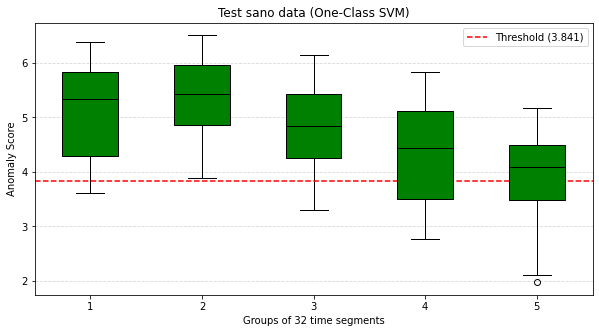

In [22]:
# Agrupamos los scores en bloques de 32
test_sano_grouped = group_scores(scores_test_sano, group_size=32)
fallo1_grouped = group_scores(scores_test_dano1, group_size=32)
fallo2_grouped = group_scores(scores_test_dano2, group_size=32)
fallo3_grouped = group_scores(scores_test_dano3, group_size=32)
fallo4_grouped = group_scores(scores_test_dano4, group_size=32)

# Graficamos
plot_grouped_scores(fallo1_grouped, threshold, "Fallo1 (One-Class SVM)", color='yellow')
plot_grouped_scores(fallo2_grouped, threshold, "Fallo2 (One-Class SVM)", color='yellow')
plot_grouped_scores(fallo3_grouped, threshold, "Fallo3 (One-Class SVM)", color='yellow')
plot_grouped_scores(fallo4_grouped, threshold, "Fallo4 (One-Class SVM)", color='yellow')
plot_grouped_scores(test_sano_grouped, threshold, "Test sano data (One-Class SVM)", color='green')

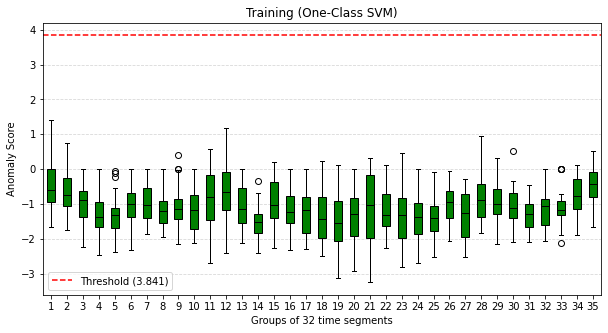

In [23]:
train_grouped = group_scores(scores_train, group_size=32)

# Graficamos
plot_grouped_scores(train_grouped, threshold, "Training (One-Class SVM)", color='green')

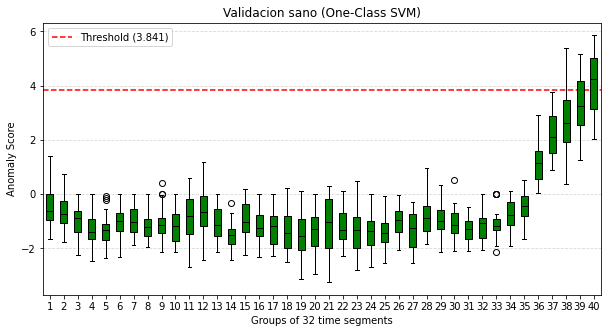

In [24]:
val_grouped = group_scores(val_scores, group_size=32)

# Graficamos
plot_grouped_scores(val_grouped, threshold, "Validacion sano (One-Class SVM)", color='green')

## Insolation forest

In [1]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Entrenamiento con datos sanos
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(train)

NameError: name 'train' is not defined

              precision    recall  f1-score   support

           0     0.6098    0.3125    0.4132       160
           1     0.8468    0.9500    0.8954       640

    accuracy                         0.8225       800
   macro avg     0.7283    0.6312    0.6543       800
weighted avg     0.7994    0.8225    0.7990       800



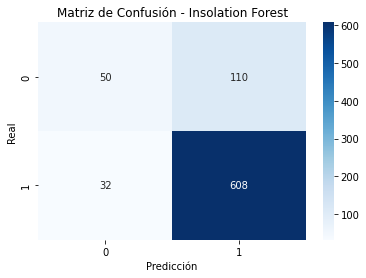

In [9]:
# Predecir: 1 (normal), -1 (anomalía)
y_pred_iso_forest= iso_forest.predict(test_all)
y_pred_iso_forest= [0 if p == 1 else 1 for p in y_pred_iso_forest]  # convertir a 0=normal, 1=anomalía

print(classification_report(y_true, y_pred_iso_forest, digits=4))
sns.heatmap(confusion_matrix(y_true, y_pred_iso_forest), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Insolation Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [10]:
val_scores_if = -iso_forest.decision_function(train_completed)
# threshold = np.percentile(val_scores, 100)  # o 97, 99, depende tu sensibilidad
# threshold
mean_score = np.mean(val_scores_if)
std_score = np.std(val_scores_if)
k = 3  # 3 sigma

threshold = mean_score + k * std_score
threshold

0.020199129617131134

In [11]:
#Scores
scores_test_dano1 = -iso_forest.decision_function(test_dano_1)
scores_test_dano2 = -iso_forest.decision_function(test_dano_2)
scores_test_dano3 = -iso_forest.decision_function(test_dano_3)
scores_test_dano4 = -iso_forest.decision_function(test_dano_4)
scores_test_sano = -iso_forest.decision_function(test_sano)
scores_train = -iso_forest.decision_function(train)
scores_test_dano3

array([0.20452657, 0.21376626, 0.20970978, 0.19957202, 0.21501955,
       0.19990521, 0.18380487, 0.18778012, 0.20970978, 0.20819287,
       0.20113293, 0.20745929, 0.20020241, 0.20004156, 0.21350373,
       0.20504078, 0.21021214, 0.21148742, 0.20309157, 0.20449496,
       0.20702422, 0.18848416, 0.21021214, 0.20255006, 0.20872206,
       0.19420115, 0.2036016 , 0.20419104, 0.19512733, 0.21400866,
       0.18902197, 0.20025823, 0.19876499, 0.20459803, 0.19823375,
       0.20210893, 0.20120635, 0.20859872, 0.19627367, 0.19710447,
       0.20409983, 0.19625871, 0.20389222, 0.19530967, 0.20221166,
       0.20015541, 0.19279787, 0.20090874, 0.20310371, 0.18564193,
       0.20324345, 0.21155325, 0.19724556, 0.20400826, 0.18985933,
       0.20450677, 0.20518863, 0.19863745, 0.20226653, 0.19208827,
       0.19295337, 0.20938433, 0.1996158 , 0.20166651, 0.20445146,
       0.19012984, 0.20560835, 0.18271589, 0.20450677, 0.20653585,
       0.20244315, 0.20961453, 0.20155227, 0.20610794, 0.18833

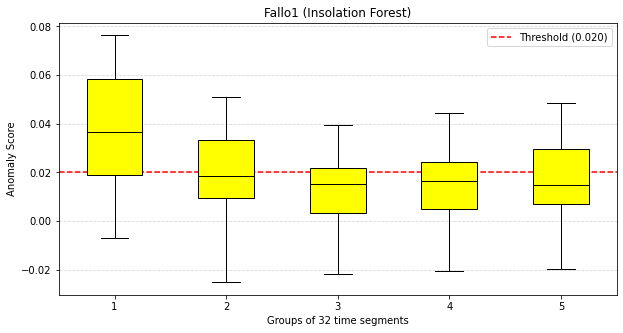

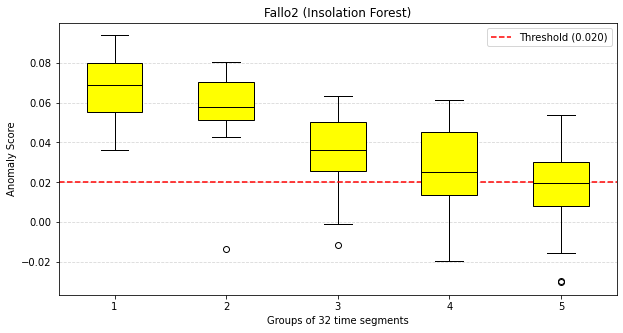

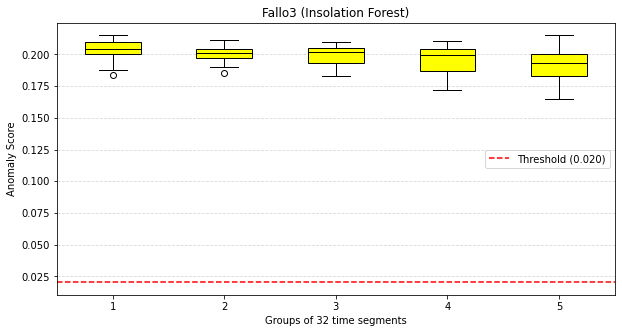

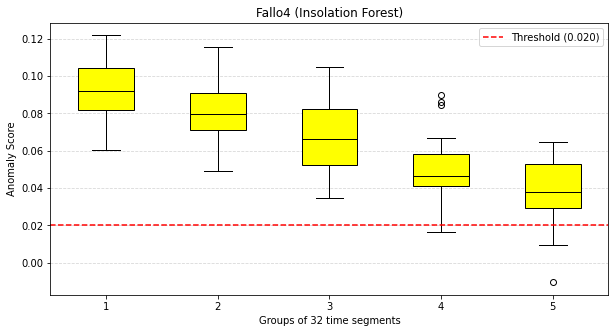

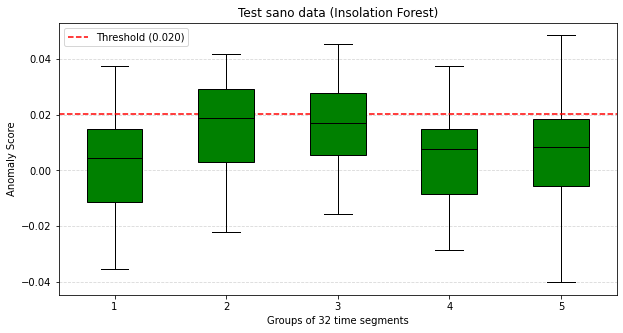

In [14]:
# Agrupamos los scores en bloques de 32
test_sano_grouped = group_scores(scores_test_sano, group_size=32)
fallo1_grouped = group_scores(scores_test_dano1, group_size=32)
fallo2_grouped = group_scores(scores_test_dano2, group_size=32)
fallo3_grouped = group_scores(scores_test_dano3, group_size=32)
fallo4_grouped = group_scores(scores_test_dano4, group_size=32)

# Graficamos
plot_grouped_scores(fallo1_grouped, threshold, "Fallo1 (Insolation Forest)", color='yellow')
plot_grouped_scores(fallo2_grouped, threshold, "Fallo2 (Insolation Forest)", color='yellow')
plot_grouped_scores(fallo3_grouped, threshold, "Fallo3 (Insolation Forest)", color='yellow')
plot_grouped_scores(fallo4_grouped, threshold, "Fallo4 (Insolation Forest)", color='yellow')
plot_grouped_scores(test_sano_grouped, threshold, "Test sano data (Insolation Forest)", color='green')

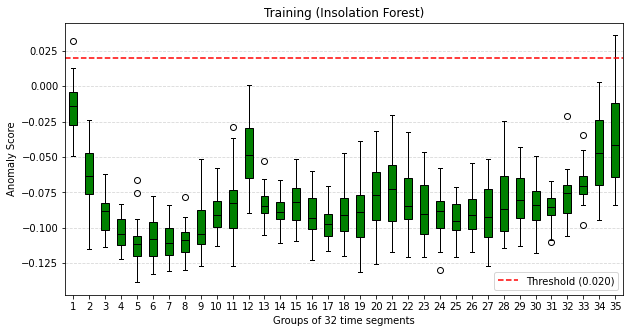

In [15]:
train_grouped = group_scores(scores_train, group_size=32)

# Graficamos
plot_grouped_scores(train_grouped, threshold, "Training (Insolation Forest)", color='green')

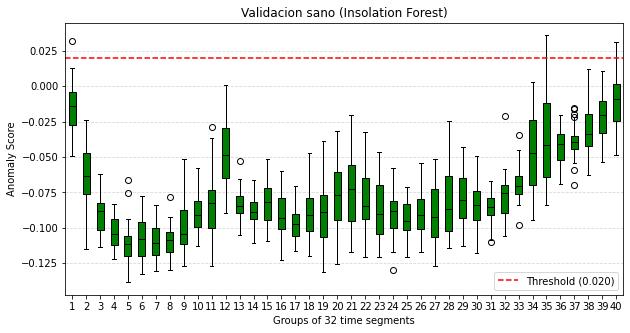

In [17]:
val_grouped = group_scores(val_scores_if, group_size=32)

# Graficamos
plot_grouped_scores(val_grouped, threshold, "Validacion sano (Insolation Forest)", color='green')